## Wine Reviews数据处理

https://github.com/jlzz/-/tree/master

导入处理数据和绘图相关的包

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False

读取数据并查看前几条数据,发现多出一列序号，删除

In [2]:
df = pd.read_csv('Wine Reviews/winemag-data_first150k.csv')#.drop(0,axis=1)
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [3]:
print(df.columns.values.tolist()[0])
df = df.drop(df.columns.values.tolist()[0],axis=1)
df.head()

Unnamed: 0


,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


查看数据的总体信息

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150930 non-null  object 
 9   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 11.5+ MB


### 1.数据可视化和摘要

#### 1.1数据摘要
遍历标称属性，输出频数，部分属性值过多，至多只输出频数前50的数据

In [5]:
def count(attribute,df):
    values = df[attribute]
    dic = {}
    for index,v in enumerate(values):
        if type(v)==str or not np.isnan(v):
            dic[v] = dic.get(v,0) + 1
        else:
            dic['nan'] = dic.get('nan',0) + 1 
    return dic

for attribute in ['country','designation','province','region_1','region_2','variety','winery']:
    dic = count(attribute,df)
    print('%s\n'%(attribute),Counter(dic).most_common(50)) 

country
 [('US', 62397), ('Italy', 23478), ('France', 21098), ('Spain', 8268), ('Chile', 5816), ('Argentina', 5631), ('Portugal', 5322), ('Australia', 4957), ('New Zealand', 3320), ('Austria', 3057), ('Germany', 2452), ('South Africa', 2258), ('Greece', 884), ('Israel', 630), ('Hungary', 231), ('Canada', 196), ('Romania', 139), ('Slovenia', 94), ('Uruguay', 92), ('Croatia', 89), ('Bulgaria', 77), ('Moldova', 71), ('Mexico', 63), ('Turkey', 52), ('Georgia', 43), ('Lebanon', 37), ('Cyprus', 31), ('Brazil', 25), ('Macedonia', 16), ('Serbia', 14), ('Morocco', 12), ('England', 9), ('Luxembourg', 9), ('India', 8), ('Lithuania', 8), ('Czech Republic', 6), ('nan', 5), ('Ukraine', 5), ('Switzerland', 4), ('Bosnia and Herzegovina', 4), ('South Korea', 4), ('China', 3), ('Slovakia', 3), ('Egypt', 3), ('Albania', 2), ('Japan', 2), ('Montenegro', 2), ('Tunisia', 2), ('US-France', 1)]
designation
 [('nan', 45735), ('Reserve', 2752), ('Reserva', 1810), ('Estate', 1571), ('Barrel sample', 1326), ('Ris

对数值属性进行五数概括，并统计缺失值数量

In [6]:
def describe(attribute,df):
    values = df[attribute]
    print(values.describe())

for attribute in ['points','price']:
    describe(attribute,df)
    print('缺失值的个数：%d\n'% df[attribute].isnull().sum())

count    150930.000000
mean         87.888418
std           3.222392
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64
缺失值的个数：0

count    137235.000000
mean         33.131482
std          36.322536
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64
缺失值的个数：13695



#### 1.2数据可视化
对数值属性绘制直方图和盒图

c:\users\jlz\appdata\local\conda\conda\envs\my_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


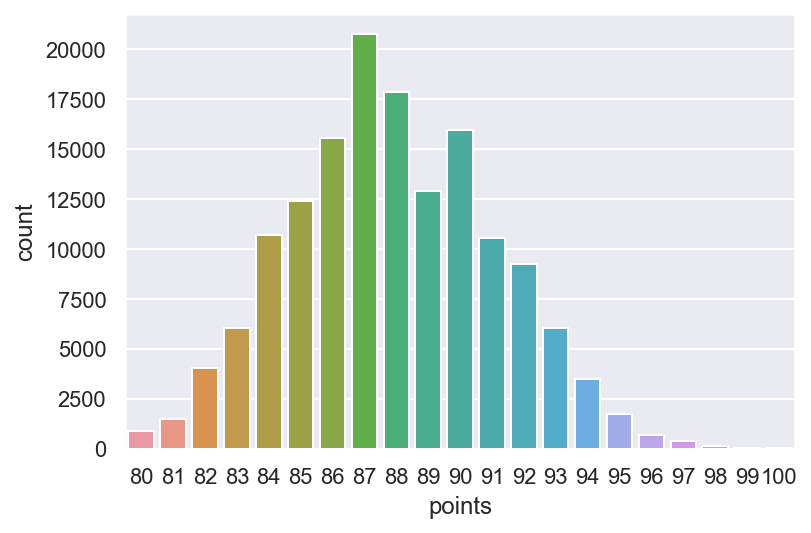

c:\users\jlz\appdata\local\conda\conda\envs\my_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


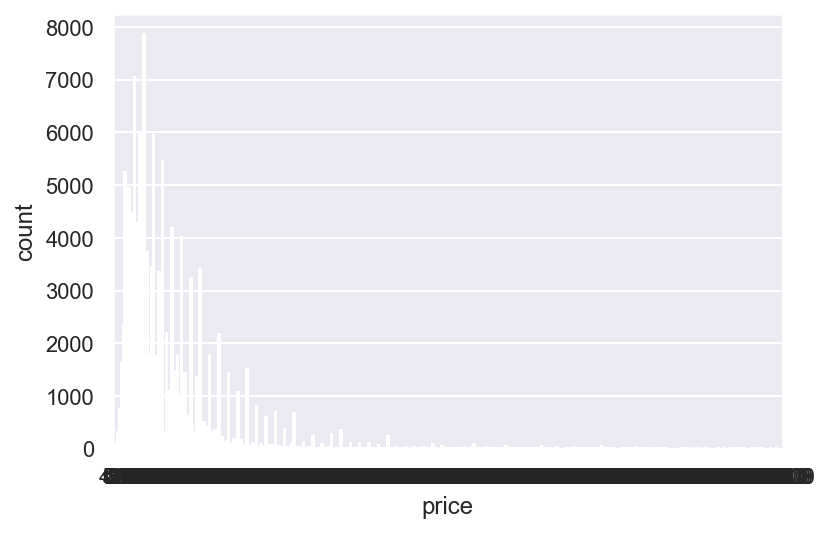

In [7]:
%config InlineBackend.figure_format='retina'
sns.set()
for attribute in ['points','price']:
    sns.countplot(df[attribute])
    plt.show()

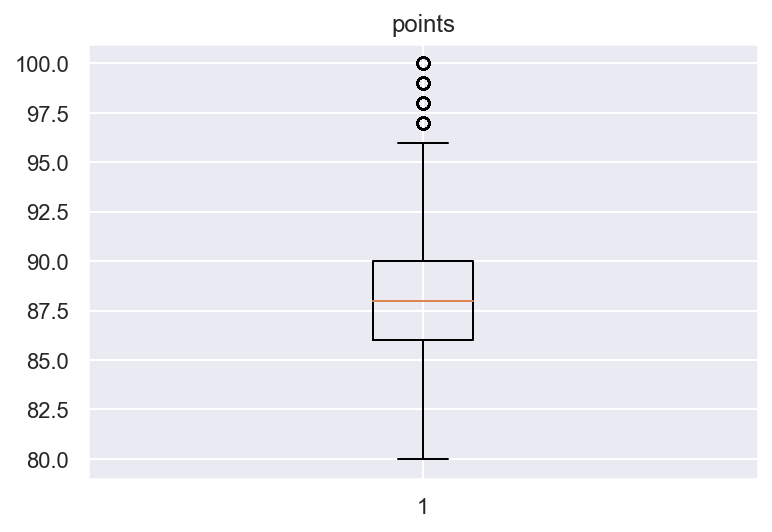

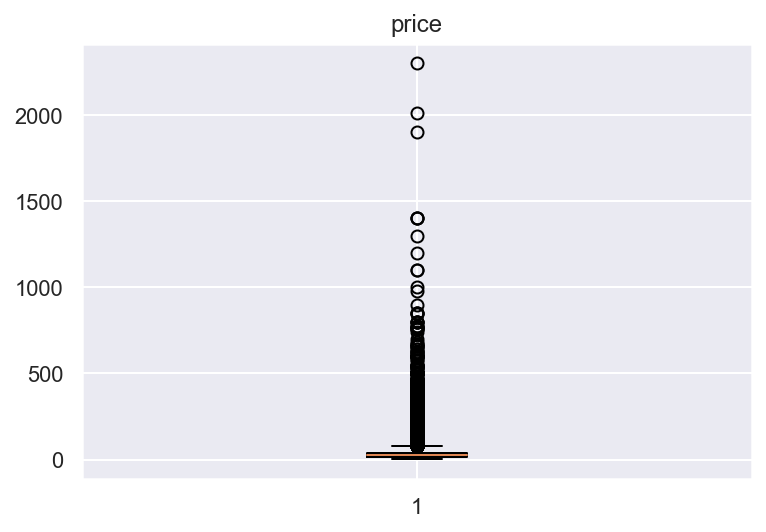

In [8]:
def draw_Box_plot(data,title=None):
    plt.boxplot(data)
    plt.title(title)
    plt.show()
for attribute in ['points','price']:
    draw_Box_plot(df[attribute].dropna(),title=attribute)

### 2.数据缺失的处理

#### 2.1剔除缺失部分
对于country为空的数据，将之删去

In [9]:
df2 = df.copy()
df2 = df2.dropna(subset=['country'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150925 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150925 non-null  object 
 2   designation  105190 non-null  object 
 3   points       150925 non-null  int64  
 4   price        137230 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150925 non-null  object 
 9   winery       150925 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB


#### 2.2用最高频率值填补缺失值
对于designation，采用最高频率值进行填充

In [10]:
df2['designation'] = df2['designation'].fillna(df2['designation'].mode()[0])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150925 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150925 non-null  object 
 2   designation  150925 non-null  object 
 3   points       150925 non-null  int64  
 4   price        137230 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150925 non-null  object 
 9   winery       150925 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB


#### 2.3通过属性的相关关系来填补缺失值
通过points估计price的值，并进行填充

In [11]:
df2.corr()

,points,price
points,1.000000,0.459869
price,0.459869,1.000000


In [12]:
from statsmodels.formula.api import ols
df_del = df2.dropna(how="any", subset=["price"])
points = df2[df2['price'].isnull()]['points']
model = ols("price ~points",data=df_del).fit()
price_pred = model.predict(points)
# 使用预测值填充空值
for i in price_pred.keys():
    df2[i-1:i]['price'] = price_pred[i]
df2.info()

c:\users\jlz\appdata\local\conda\conda\envs\my_env\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150925 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150925 non-null  object 
 2   designation  150925 non-null  object 
 3   points       150925 non-null  int64  
 4   price        140664 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150925 non-null  object 
 9   winery       150925 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB


#### 2.4通过数据对象之间的相似性来填补缺失值
对于region_1,region_2，二者之间存在关联且和province存在关系

易知region_1缺失则region_2一定缺失，根据province填充region_1，根据region_1填充region_2

In [13]:
df2[df2['region_1'].isnull() & df2['region_2'].notnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      0 non-null      object 
 1   description  0 non-null      object 
 2   designation  0 non-null      object 
 3   points       0 non-null      int64  
 4   price        0 non-null      float64
 5   province     0 non-null      object 
 6   region_1     0 non-null      object 
 7   region_2     0 non-null      object 
 8   variety      0 non-null      object 
 9   winery       0 non-null      object 
dtypes: float64(1), int64(1), object(8)
memory usage: 0.0+ bytes


通过同省份的最大频率region_1填充缺失的region_1，若无法填充，则以province填充

In [14]:
dic = Counter(count('province',df2))
for province in dic:
    df3 = df2[df2['province']==province]
    df4 = df3[df3['region_1'].isnull()]
    if len(df4) > 0:
        df5 = df3[df3['region_1'].notnull()]
        if len(df5) > 0: 
            df4['region_1'] = df4['region_1'].fillna(df5['region_1'].mode()[0])
        else:
            df4['region_1'] = df4['region_1'].fillna(province)
        df2.update(df4)
df2.info()

c:\users\jlz\appdata\local\conda\conda\envs\my_env\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150925 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150925 non-null  object 
 2   designation  150925 non-null  object 
 3   points       150925 non-null  float64
 4   price        140664 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     150925 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150925 non-null  object 
 9   winery       150925 non-null  object 
dtypes: float64(2), object(8)
memory usage: 12.7+ MB


通过同region_1的最大频率region_2填充缺失的region_2，若无法填充，则以region_1填充

In [15]:
dic = Counter(count('region_1',df2))
for region_1 in dic:
    if region_1 =='nan':
        continue
    df3 = df2[df2['region_1']==region_1]
    df4 = df3[df3['region_2'].isnull()]
    if len(df4) > 0:
        df5 = df3[df3['region_2'].notnull()]
        if len(df5) > 0: 
            #print(region_1,df5['region_2'].mode()[0])
            df4['region_2'] = df4['region_2'].fillna(df5['region_2'].mode()[0])
        else:
            df4['region_1'] = df4['region_1'].fillna(region_1)
        df2.update(df4)
df2.info()

c:\users\jlz\appdata\local\conda\conda\envs\my_env\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150925 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150925 non-null  object 
 2   designation  150925 non-null  object 
 3   points       150925 non-null  float64
 4   price        140664 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     150925 non-null  object 
 7   region_2     61051 non-null   object 
 8   variety      150925 non-null  object 
 9   winery       150925 non-null  object 
dtypes: float64(2), object(8)
memory usage: 12.7+ MB


### 3.新旧数据对比

In [16]:
df2.info(),df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150925 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150925 non-null  object 
 2   designation  150925 non-null  object 
 3   points       150925 non-null  float64
 4   price        140664 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     150925 non-null  object 
 7   region_2     61051 non-null   object 
 8   variety      150925 non-null  object 
 9   winery       150925 non-null  object 
dtypes: float64(2), object(8)
memory usage: 12.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  ob

(None, None)